In [167]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

#LOAD ALL IMAGES FROM THE DATA FILE
imageList = tf.data.Dataset.list_files(os.path.join('data', '*.png'), 
                                   shuffle = False)
#DONT SHUFFLE TO LINE UP WITH THE TEXT FILES

#LOAD IN ALL THE TEXT FILES
#textList = tf.data.Dataset.list_files(os.path.join('data', '*.txt'), 
#                                   shuffle = False)

#prints all images
#for x in imageList.as_numpy_iterator():
#   print(x)
#for x in textList.as_numpy_iterator():
    #print(x)

In [168]:
def preprocess(filepath):
    # this is the function that will process all the images that are in the image list for basic conversion

    #read image
    img = tf.io.read_file(filepath)
    #load image
    img = tf.io.decode_png(img)
    #scaled the image to be 0-1
    #img = img / 255.0


    return img


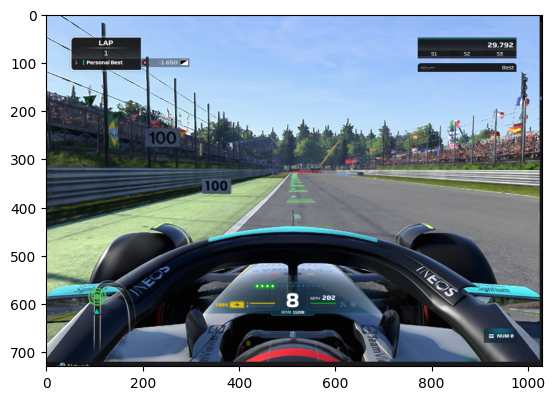

In [169]:
imageList = imageList.map(preprocess)
plt.imshow(imageList.as_numpy_iterator().next())

# BRIUNGING IN THE TEXT NOW

In [187]:
def preprocess_text(filepath):

    key = tf.io.read_file(filepath)

    return key 

In [188]:
textList = tf.data.Dataset.list_files(os.path.join('data', '*.txt'), 
                                   shuffle = False)
textList = textList.map(lambda x: tf.py_function(preprocess_text, [x], (tf.string)))
for x in textList.as_numpy_iterator():
    print(x)

b'up arrow\r\n'
b'right arrow,down arrow\r\n'
b'right arrow,down arrow\r\n'
b'right arrow,down arrow\r\n'
b'right arrow\r\n'
b'right arrow,up arrow\r\n'
b'right arrow,up arrow\r\n'
b'right arrow,up arrow\r\n'
b'right arrow,up arrow\r\n'
b'right arrow,up arrow\r\n'
b'right arrow\r\n'
b'right arrow,up arrow\r\n'
b'right arrow,up arrow\r\n'
b'right arrow,up arrow\r\n'
b'right arrow,up arrow\r\n'
b'right arrow,up arrow\r\n'
b'right arrow,up arrow\r\n'
b'right arrow,up arrow\r\n'
b'right arrow,up arrow\r\n'
b'up arrow\r\n'
b'right arrow,up arrow\r\n'
b'up arrow\r\n'
b'up arrow\r\n'
b'left arrow,up arrow\r\n'
b'up arrow\r\n'
b'up arrow\r\n'
b'up arrow\r\n'
b'right arrow,up arrow\r\n'
b'up arrow\r\n'
b'up arrow\r\n'
b'left arrow,up arrow\r\n'
b'up arrow\r\n'
b'up arrow\r\n'
b'up arrow\r\n'
b'up arrow\r\n'
b'up arrow\r\n'
b'up arrow\r\n'
b'up arrow\r\n'
b'right arrow,up arrow\r\n'
b'up arrow\r\n'
b'up arrow\r\n'
b'up arrow\r\n'
b'up arrow\r\n'
b'up arrow\r\n'
b'up arrow\r\n'
b'up arrow\r\n'
b'

In [185]:
dataset = tf.data.Dataset.zip((imageList, textList))
x, y = dataset.as_numpy_iterator().next()
len(dataset)
dataset = dataset.cache()
dataset = dataset.shuffle(40)
dataset = dataset.batch(8)
dataset = dataset.prefetch(4)

len(dataset)

72